# Data in Motion Weekly Data Analysis Challenge
## Week 3: Where the Drinks Flow

Link to dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv

Challenge Questions:
1. Which continent drinks more beer on average?
2. For each continent print the statistics for wine consumption.
3. Print the mean alcohol consumption per continent for every column.
4. Print the median alcohol consumption per continent for every column.

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
cmap = 'blues'

In [3]:
# read in data:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

In [5]:
# view head of data
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [6]:
# view info
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 1. Which continent drinks more beer on average?

In [12]:
beer = drinks.groupby('continent')['beer_servings']\
       .agg('mean')\
       .sort_values(ascending=False)\
       .reset_index()
beer

,continent,beer_servings
0,EU,193.777778
1,SA,175.083333
2,OC,89.687500
3,AF,61.471698
4,AS,37.045455


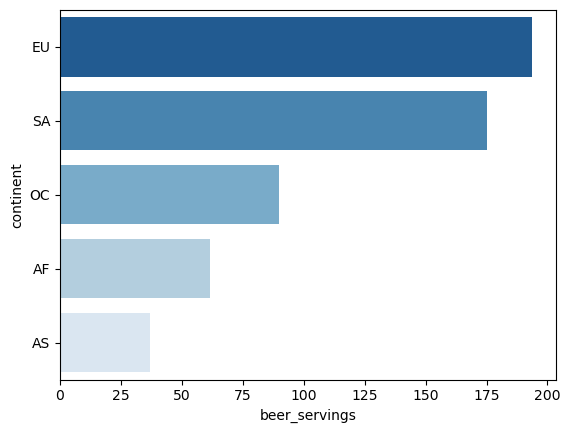

In [13]:
sns.barplot(x='beer_servings',
            y='continent',
            data=beer,
            orient = 'h',
            palette='Blues_r')

plt.show()

**Europe drinks the most beer.**

### 2. For each continent print the statistics for wine consumption.

In [16]:
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### 3. Print the mean alcohol consumption per continent for every column.

In [19]:
drink_avg = drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']]\
            .agg('mean')

drink_avg

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### 4. Print the median alcohol consumption per continent for every column.

In [20]:
drink_median = drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']]\
            .agg('median')

drink_median

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85
